In [1]:
import hydrobr
import geopandas as gpd
from shapely.geometry import Point

In [2]:
def select_stations_area(area, list_stations, buffer=0):
    """
    Seleciona as estações que estão dentro de uma área de interesse.
    :param area: Área de interesse como um objeto GeoPandas
    :param list_stations: Lista de estações como objeto geopandas
    :param buffer: Float, Opcional, Padrão = 0 - Buffer na área de interesse
    :return: Retorna um objeto Geopandas com as estações selecionadas
    """
    #Converte o formato das colunas Latitude e Longitude
    if list_stations.Longitude.dtype != float:
        list_stations.Longitude = list_stations.Longitude.astype(float)
    if list_stations.Latitude.dtype != float:
        list_stations.Latitude = list_stations.Latitude.astype(float)   
    
    # Cria uma Geometria de Pontos
    pontos=[Point(x) for x in zip(list_stations.Longitude,list_stations.Latitude)]
    crs={'proj':'latlong','ellps':'WGS84','datum':'WGS84','no_def':True} #SC WGS 84
    
    # Define o sistema de coordenadas como WGS 84
    list_stations=gpd.GeoDataFrame(list_stations,crs=crs,geometry=pontos)
    
    # Seleciona as estações que estão dentro da bacia
    list_stations = list_stations[list_stations.geometry.within(area.geometry[0].buffer(buffer))]
    return list_stations

<AxesSubplot:>

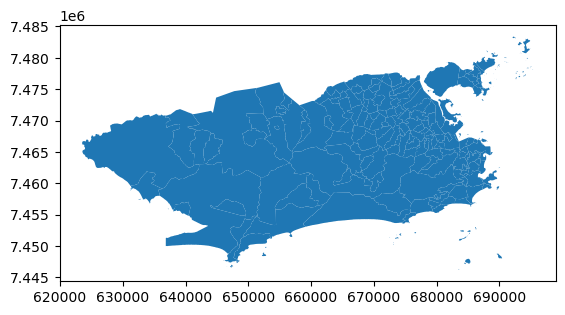

In [3]:
#Abrindo o shapefile da área de interesse
area = gpd.read_file(r'shapefiles\Limite_De_Bairros.shp')
#Plotando o shapefile da área de interesse
area.plot()

In [4]:
# Obtendo as estações automaticas e convencionais
lista_inmet = hydrobr.get_data.INMET.list_stations() 

In [5]:
dadosRJ = lista_inmet[lista_inmet['State'] == 'RJ']
dadosRJ

,Code,Type,Name,State,Latitude,Longitude,Height,Start Operation,End Operation
2,83007,Conventional,ALTO DA BOA VISTA,RJ,-22.96583333,-43.27916666,347.1,1966-05-31 21:00:00-03:00,In operation
31,83698,Conventional,CAMPOS,RJ,-21.74249999,-41.33277777,11.2,1911-06-16 21:25:56-02:34,In operation
47,83718,Conventional,CORDEIRO,RJ,-22.02222221,-42.36444444,505.9,1971-07-15 21:00:00-03:00,In operation
62,83114,Conventional,IGUABA GRANDE,RJ,-22.84694444,-42.18555555,5.6,1969-12-31 21:00:00-03:00,In operation
69,83695,Conventional,ITAPERUNA,RJ,-21.20444444,-41.90555555,123.6,1921-12-31 21:00:00-03:00,In operation
117,83738,Conventional,RESENDE,RJ,-22.45111111,-44.44472221,439.9,1944-05-21 21:00:00-03:00,In operation
122,83696,Conventional,SANTA MARIA MADALENA,RJ,-21.96805554,-42.00305555,640,1921-12-20 21:00:00-03:00,In operation
141,83744,Conventional,TERESOPOLIS,RJ,-22.41722221,-42.97222221,874.2,1912-12-31 21:25:56-02:34,In operation
23,A628,Automatic,ANGRA DOS REIS,RJ,-22.97555554,-44.30333333,6,2017-08-24 21:00:00-03:00,In operation
41,A606,Automatic,ARRAIAL DO CABO,RJ,-22.97527777,-42.02138888,5,2006-09-21 21:00:00-03:00,In operation
